In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
os.chdir("/content/gdrive/My Drive/computer_vision") 

In [3]:
! pwd

/content/gdrive/My Drive/computer_vision


In [4]:
! ls

im1.jpg  im2.jpg  im3.jpg


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mp_image

%matplotlib inline

In [6]:
!pip install opencv-python
!pip install --upgrade scikit-image

     |████████████████████████████████| 26.5MB 1.7MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scikit-image 0.15.0
    Uninstalling scikit-image-0.15.0:
      Successfully uninstalled scikit-image-0.15.0


In [0]:
# Python Imaging Library: PIL. The Python Imaging Library (PIL) adds 
# image processing capabilities to your Python interpreter. 
from PIL import Image
# scikit-image (a.k.a. skimage) is a collection of algorithms for 
# image processing and computer vision.
import skimage as sk
from skimage import io as sk_io
import cv2

### 1. PIL格式图片

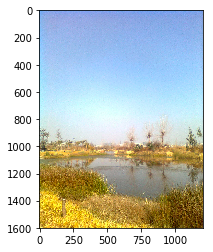

In [9]:
pil_image = Image.open('im1.jpg')
# Set up a figure of an appropriate size
fig = plt.figure(figsize=(4, 4))
image_1 = plt.imshow(pil_image)
# Show the plot
plt.show()

PIL图片的类型如下：

In [10]:
type(pil_image)

PIL.JpegImagePlugin.JpegImageFile

convert a PIL image to a Numpy array:

numpy.ndarray

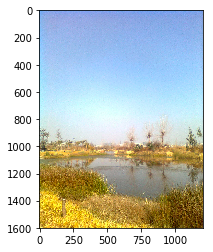

In [12]:
pil_array = np.array(pil_image)
plt.imshow(pil_array)
type(pil_array)

rotate

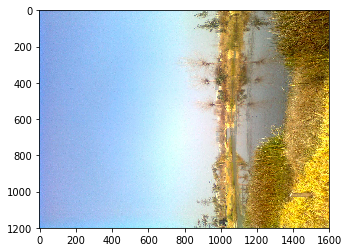

In [28]:
r_pil_image = pil_image.rotate(90, expand = 1) 
plt.imshow(r_pil_image)

The expand parameter tells PIL to change the image dimenions to fit the rotated orientation. Without this, we'd get an image with the original dimensions with a resized, rotated version of the image and the space that was created filled in, like this:

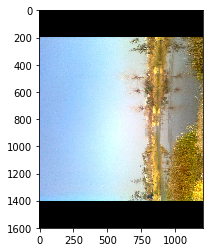

In [29]:
r_pil_image = pil_image.rotate(90)
plt.imshow(r_pil_image)

resizing

In [36]:
from PIL import ImageOps
old_wid, old_heig = pil_image.size
print(old_wid, old_heig)

1200 1600


<PIL.Image.Image image mode=RGB size=600x800 at 0x7FA5229D0AC8>


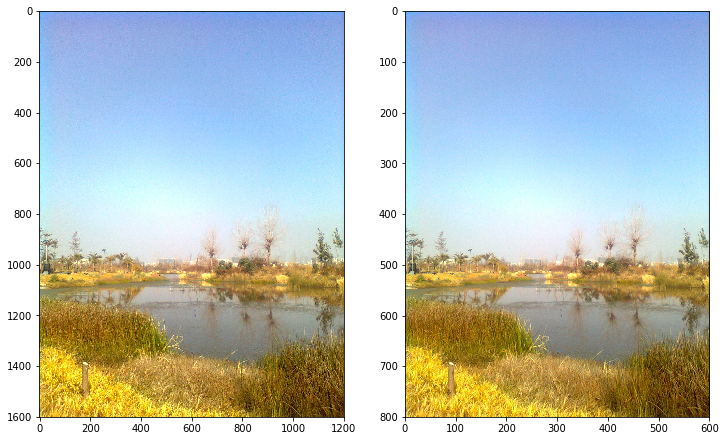

In [38]:
resized_im = pil_image.copy() #为了不影响后续使用故用copy版
resized_im.thumbnail((800,800), Image.ANTIALIAS) # thumbnail方法是成比例缩小pixels，不会引起图片形变
new_wid, new_heig = resized_im.size
print(resized_im)

fig = plt.figure(figsize = (12,12))
fig.add_subplot(1,2,1)
plt.imshow(pil_image)

fig.add_subplot(1,2,2)
plt.imshow(resized_im)

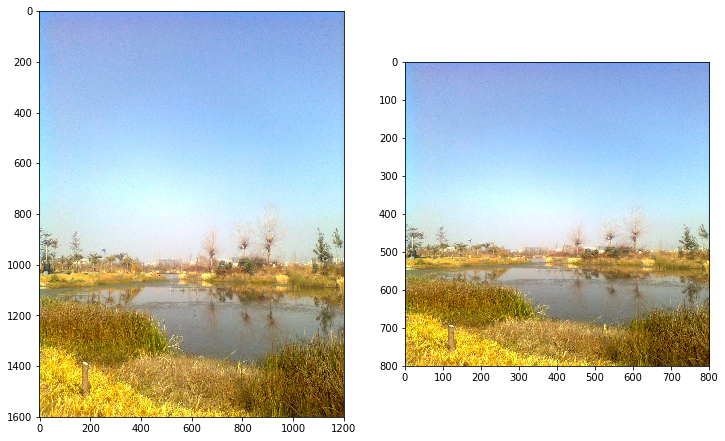

In [39]:
resized_img = pil_image.resize((800,800)) #resize会改变形状
fig = plt.figure(figsize = (12,12))
fig.add_subplot(1,2,1)
plt.imshow(pil_image)

fig.add_subplot(1,2,2)
plt.imshow(resized_img)

saving images

In [0]:
# resized_im.save(file_path, format="JEPG")

### 2. sci-image格式

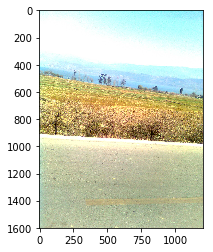

In [14]:
sk_image = sk_io.imread('im2.jpg')
plt.figure(figsize=(4,4))
im_2 = plt.imshow(sk_image)
plt.show()

simage的格式类型如下：

In [15]:
type(sk_image)

numpy.ndarray

convert color images to grayscale

(1600, 1200)

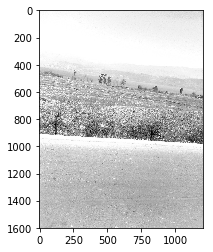

In [24]:
sk_gray_image = sk.color.rgb2gray(sk_image)
plt.imshow(sk_gray_image, 'gray') #注意加上'gray'
sk_gray_image.shape

rotate

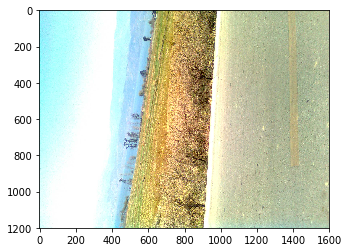

In [30]:
from skimage import transform as sk_transform
r_sk_image = sk_transform.rotate(sk_image, 90, resize = True)
plt.imshow(r_sk_image)

saving images

In [0]:
# sk_io.imsave(fname=file_path, arr=r_sk_image)

### 3. OpenCV

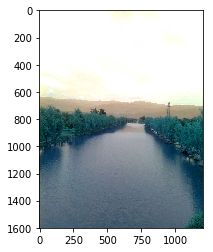

In [16]:
cv_image = cv2.imread('im3.jpg')
plt.figure(figsize=(4,4))
im_3 = plt.imshow(cv_image)
plt.show()

OpenCV图片格式如下：

In [17]:
type(cv_image)

numpy.ndarray

OpenCV library loads images in a different default format from the 
others, so we need to do some conversion to get it to look right:



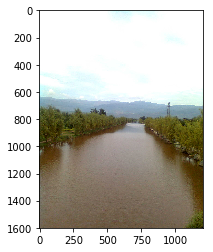

In [19]:
cv_image_rgb = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
plt.imshow(cv_image_rgb)

convert images in Numpy array format to PIL images:

PIL.Image.Image

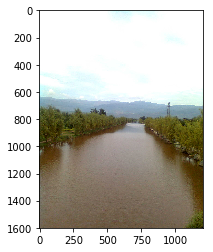

In [20]:
pil_cv_image = Image.fromarray(cv_image_rgb)
plt.imshow(pil_cv_image)
type(pil_cv_image)

rotate

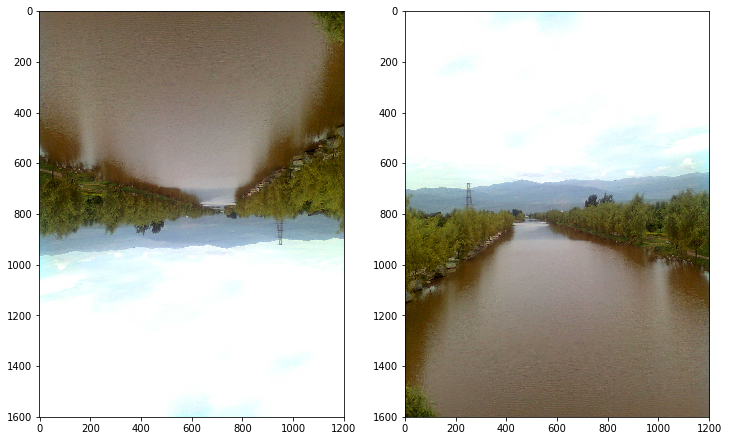

In [33]:
vertical_cv_image = np.flip(cv_image_rgb, axis = 0) #垂直翻转
hori_cv_image = np.flip(cv_image_rgb, axis = 1) #水平翻转

fig = plt.figure(figsize=(12,12))
fig.add_subplot(1,2,1)
image_plot_1 = plt.imshow(vertical_cv_image)

fig.add_subplot(1,2,2)
image_plot_2 = plt.imshow(hori_cv_image)

saving images

In [0]:
# cv2.imwrite(filename=file_path, img=vertical_cv_image)

In [0]:
# plt.imsave(file_path, image)